In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import cv2

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Strategy

### Phase 1
1. Load data
2. Visual data
3. Train with basic model
4. Plot history (accuracy, val_accuracy, loss, val_loss)
5. Test with camera

### Phase 2
1. Augment data
  - Shift
  - Rotate
2. Visual augmented data
3. Train with basic model
4. Plot history (accuracy, val_accuracy, loss, val_loss)
5. Train with more complicated architecture
6. Plot history (accuracy, val_accuracy, loss, val_loss)
7. Improve: Repeat from step 1
8. Test with camera

## Load data

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

## Visual data

In [3]:
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
print('Training set size: {}'.format(len(df_train)))
print('Test set size: {}'.format(len(df_test)))

Training set size: 27455
Test set size: 7172


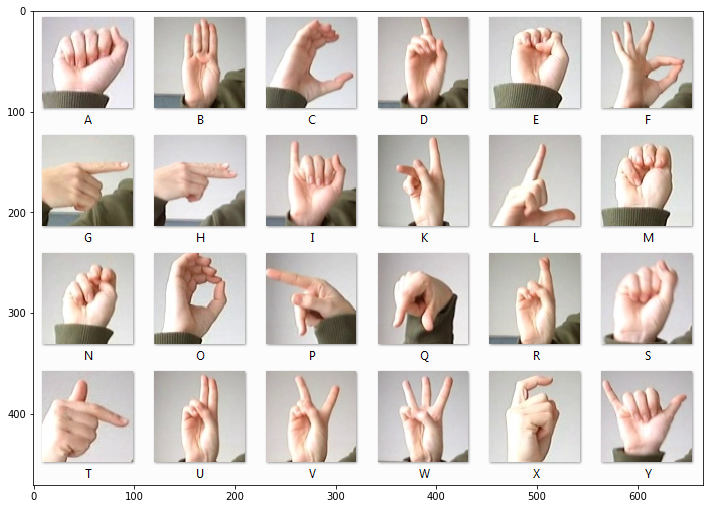

In [9]:
signs = cv2.imread('dataset/amer_sign2.png')
signs = cv2.cvtColor(signs, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.imshow(signs)

In [10]:
df = pd.concat([df_train, df_test])

In [11]:
print('Total size: {}'.format(len(df)))

Total size: 34627


In [12]:
y = df['label'].values.reshape(-1, 1)
X = df.drop('label', axis=1).values.reshape(len(df), 28, 28)

In [27]:
def show_images(X, y, index):
    print('a{}'.format(y[index]))
    plt.imshow(X[index], cmap='gray')
    plt.show()

a[3]


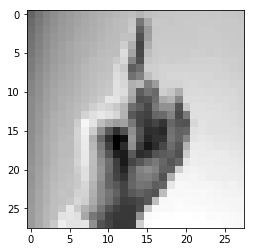

a[6]


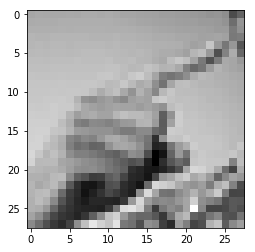

a[2]


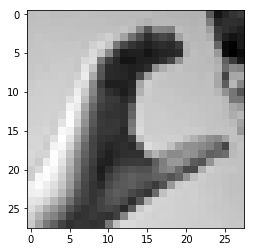

a[13]


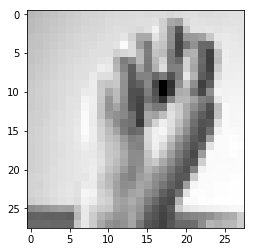

a[16]


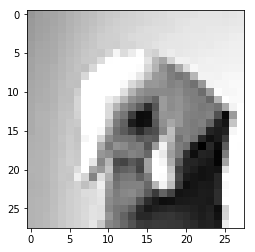

a[8]


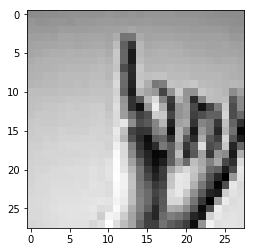

a[22]


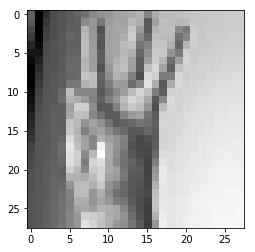

a[18]


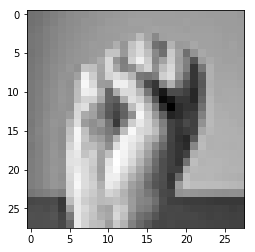

a[10]


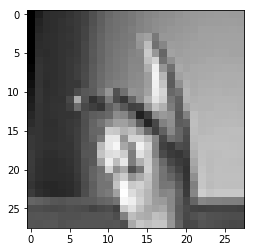

a[20]


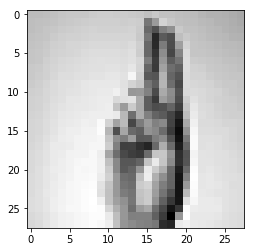

a[17]


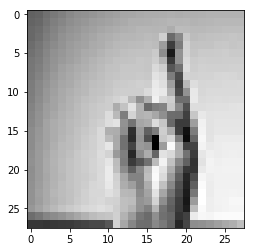

a[19]


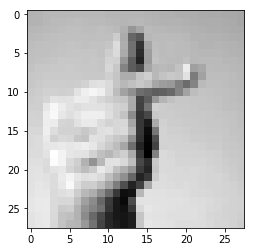

a[21]


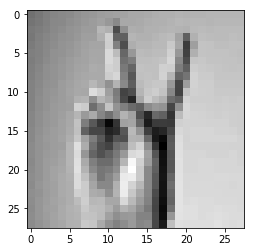

a[23]


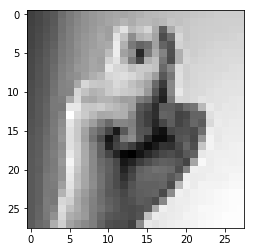

a[24]


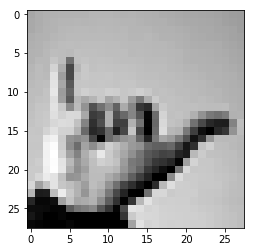

a[1]


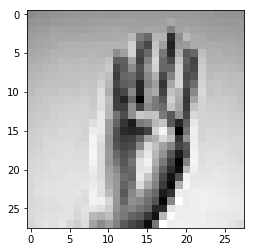

a[12]


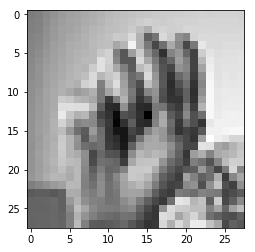

a[11]


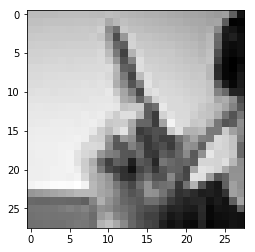

a[15]


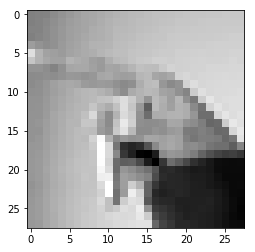

a[4]


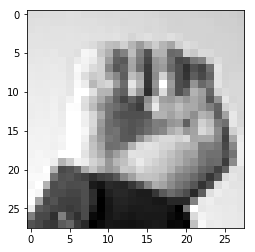

a[0]


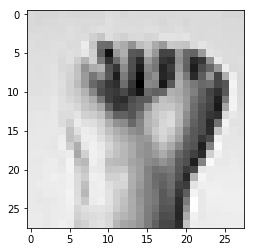

a[5]


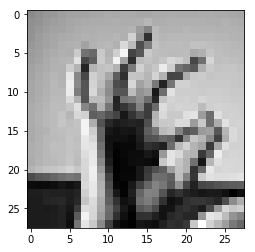

a[7]


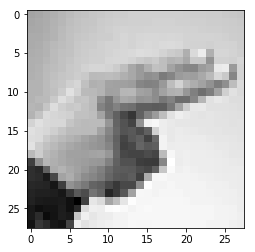

a[14]


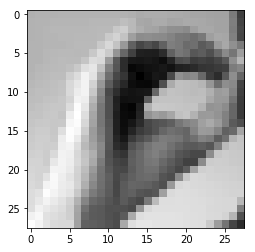

In [28]:
test_labels = []
for i in range(100):
    y_element = y[i][0]
    
    if y_element not in test_labels:
        show_images(X, y, i)
        test_labels.append(y_element)

In [22]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(y.reshape(-1, 1))
y_encoded = encoder.transform(y)

In [23]:
y_encoded[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [24]:
X = X / 255.0

In [25]:
X[0]

array([[0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
        0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471,
        0.61960784, 0.62745098, 0.63921569, 0.64705882, 0.62352941,
        0.65098039, 0.65882353, 0.66666667, 0.66666667, 0.67058824,
        0.67058824, 0.67058824, 0.6745098 , 0.67058824, 0.67058824,
        0.66666667, 0.66666667, 0.6627451 ],
       [0.43529412, 0.4745098 , 0.50588235, 0.52941176, 0.55294118,
        0.56470588, 0.58039216, 0.59215686, 0.60392157, 0.61568627,
        0.62745098, 0.63921569, 0.64313725, 0.66666667, 0.46666667,
        0.59607843, 0.67058824, 0.67058824, 0.66666667, 0.67058824,
        0.6745098 , 0.6745098 , 0.6745098 , 0.6745098 , 0.6745098 ,
        0.67058824, 0.67058824, 0.66666667],
       [0.44313725, 0.48235294, 0.51372549, 0.5372549 , 0.55686275,
        0.56862745, 0.58823529, 0.59607843, 0.60784314, 0.61960784,
        0.63137255, 0.63921569, 0.64313725, 0.6745098 , 0.41176471,
        0.55686275, 0.6666

In [26]:
file_handler = open('sign-language.obj', 'wb')
pickle.dump(encoder, file_handler)
file_handler.close()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(len(X), 28, 28, 1),
    y_encoded,
    test_size=0.2,
    random_state=40
)

## Train with basic model

It should be using padding

In [28]:
class BasicModel:
    @staticmethod
    def build(width, height, channels):
        model = Sequential([
            Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(height, width, channels)),
            Conv2D(32, (3, 3), padding='same', activation='relu'),
            MaxPool2D(pool_size=(2, 2)),
            
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            MaxPool2D(pool_size=(2, 2)),
            
            Conv2D(128, (3, 3), padding='same', activation='relu'),
            Conv2D(128, (3, 3), padding='same', activation='relu'),
            Flatten(),
            
            Dense(1000, activation='relu'),
            Dense(24, activation='softmax'),
        ])
        model.build()
        return model

In [29]:
image_shape = X[0].shape

model = BasicModel.build(image_shape[1], image_shape[0], 1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [31]:
BATCH_SIZE = 128
EPOCHS = 10

In [32]:
print(X_train.shape)
print(y_train.shape)

(27701, 28, 28, 1)
(27701, 24)


In [33]:
steps_per_epoch = len(X_train) / BATCH_SIZE
validation_steps = len(X_test) / BATCH_SIZE

history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=(X_test, y_test)
)

Train on 27701 samples, validate on 6926 samples
Epoch 1/10
27701/27701 [==============================] - 18s 645us/sample - loss: 0.9706 - categorical_accuracy: 0.7017 - val_loss: 0.0530 - val_categorical_accuracy: 0.9857
Epoch 2/10
27701/27701 [==============================] - 7s 254us/sample - loss: 0.0300 - categorical_accuracy: 0.9918 - val_loss: 0.0173 - val_categorical_accuracy: 0.9939
Epoch 3/10
27701/27701 [==============================] - 7s 250us/sample - loss: 0.0087 - categorical_accuracy: 0.9973 - val_loss: 0.0049 - val_categorical_accuracy: 0.9990
Epoch 4/10
27701/27701 [==============================] - 7s 249us/sample - loss: 0.0158 - categorical_accuracy: 0.9949 - val_loss: 0.0472 - val_categorical_accuracy: 0.9848
Epoch 5/10
27701/27701 [==============================] - 7s 252us/sample - loss: 0.0050 - categorical_accuracy: 0.9986 - val_loss: 0.0015 - val_categorical_accuracy: 0.9996
Epoch 6/10
27701/27701 [==============================] - 7s 252us/sample - loss

In [34]:
model.save('basic_model.h5')

## Plot history

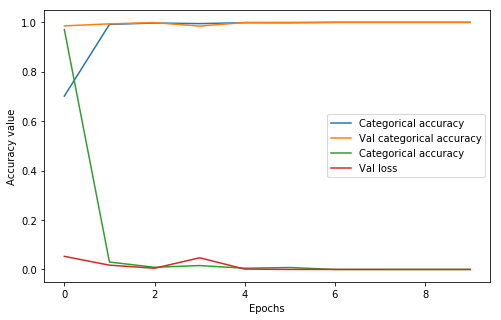

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(history.history['categorical_accuracy'], label='Categorical accuracy')
ax.plot(history.history['val_categorical_accuracy'], label='Val categorical accuracy')
ax.plot(history.history['loss'], label='Categorical accuracy')
ax.plot(history.history['val_loss'], label='Val loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy value')
ax.legend(loc='center right')
plt.show()